![Los Angeles skyline](assets/la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

Explore the crimes.csv dataset and use your findings to answer the following questions:

- Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
- Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("data/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


0         17
1         11
2         16
3         12
4          6
          ..
247983    11
247984    18
247985    10
247986    16
247987     9
Name: HOUR OCC, Length: 247988, dtype: int64

The hour with the highest frequency of crimes is 12h.


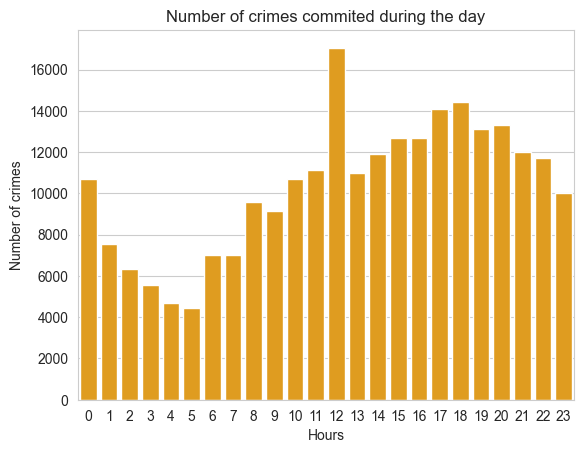

In [2]:
# 1 - Peak hour with the highest frequency of crimes
# Extract the hour from "TIME OCC"
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
print(crimes["HOUR OCC"])

# Select the peak hour
peak_crime_hour = crimes["HOUR OCC"].value_counts().index[0]
print(f"\nThe hour with the highest frequency of crimes is {peak_crime_hour}h.")

# Plot "HOUR OCC"
sns.set_style("whitegrid")
g = sns.countplot(data=crimes, x="HOUR OCC", color="orange")
g.set_title("Number of crimes commited during the day")
g.set(xlabel="Hours",
      ylabel="Number of crimes")
plt.show()

      AREA NAME  HOUR OCC
0   77th Street     15408
1       Central     18732
2    Devonshire     10184
3      Foothill      7960
4        Harbor      9701
5    Hollenbeck      9063
6     Hollywood     12761
7       Mission      9175
8   N Hollywood     11728
9        Newton     12790
10    Northeast     10686
11      Olympic     12792
12      Pacific     13866
13      Rampart     11725
14    Southeast     12600
15    Southwest     14194
16      Topanga      9968
17     Van Nuys     10640
18      West LA     11169
19  West Valley     10766
20     Wilshire     12080

The area with the largest volume of night crime is Central.


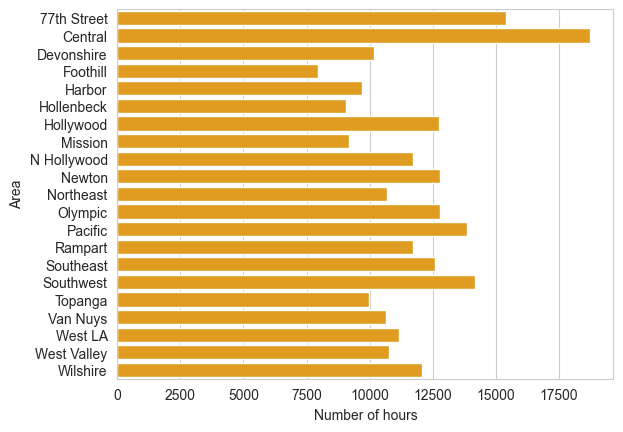

In [3]:
# 2 - Area with the largest frequency of night crimes (crimes committed between 10pm and 3:59am)
# Filter crimes commited between 10pm and 3.59am
night_time = crimes[crimes["HOUR OCC"].isin([22, 23, 0, 1, 2, 3])]
#night_time = ~crimes[crimes["HOUR OCC"]<=22 and crimes["HOUR OCC"]>=3]
#night_time

# Groupby
night_crime_location = crimes.groupby("AREA NAME", as_index=False)["HOUR OCC"].count()
print(night_crime_location)
peak_night_crime_location = night_crime_location.sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]
print(f"\nThe area with the largest volume of night crime is {peak_night_crime_location}.")

# Plot "AREA NAME"
sns.set_style("whitegrid")
g = sns.barplot(data=night_crime_location, x="HOUR OCC", y="AREA NAME", color="orange")
g.set(xlabel="Number of hours",
      ylabel="Area")
plt.show()

In [4]:
# 3 - Number of crimes commited againts victims by age group
# Create bins and labels for the age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut()
crimes["Age Brackets"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)
crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Brackets
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17,NaN
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247983,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV,11,18-25
247984,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST,18,18-25
247985,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST,10,18-25
247986,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV,16,26-34


Age Brackets
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


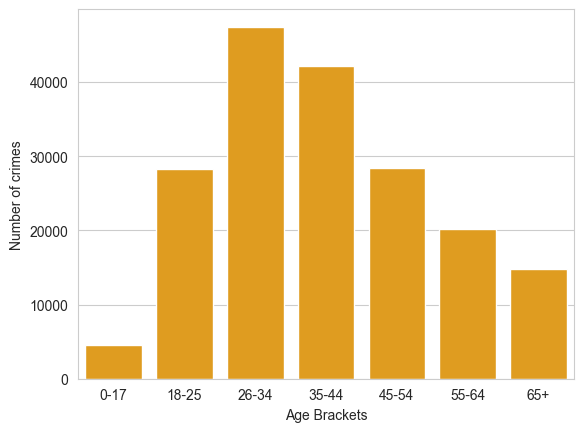

In [5]:
# Number of crimes per age category
victim_ages = crimes["Age Brackets"].value_counts().sort_index()
print(victim_ages)

# Plot "Age Brackets"
sns.set_style("whitegrid")
g = sns.barplot(x=victim_ages.index, y=victim_ages, color="orange")
g.set(xlabel="Age Brackets",
      ylabel="Number of crimes")
plt.show()